In [62]:
import pandas as pd 
import numpy as np 

df =pd.read_csv('weight-height.csv')

In [63]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [64]:
df.shape

(10000, 3)

In [65]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [66]:
import seaborn as sns

/var/folders/7d/nj3k6hhj3j1g_fkkwrvjhj880000gn/T/ipykernel_18885/2141771958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Height)


<Axes: xlabel='Height', ylabel='Density'>

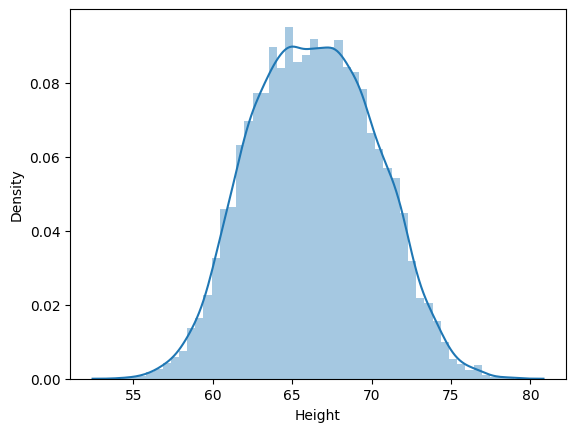

In [67]:
sns.distplot(df.Height)

<Axes: ylabel='Height'>

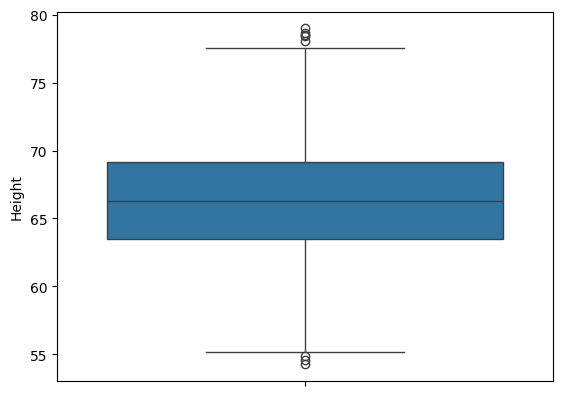

In [68]:
sns.boxplot(df.Height)

In [69]:
min_per = df.Height.quantile(0.001)
max_per = df.Height.quantile(0.999)

In [70]:
min_per

np.float64(56.06654891162125)

In [71]:
max_per

np.float64(77.06738853278372)

In [72]:
df[(df.Height >= max_per) |( df.Height <= min_per)]

,Gender,Height,Weight
912,Male,77.160801,228.707301
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
1922,Male,77.446620,232.651079
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
4297,Male,77.100872,240.455352
4569,Male,77.547186,242.041173


In [73]:
df_one = df.copy()

In [74]:
df_one = df_one[(df_one.Height <= max_per) & (df_one.Height >= min_per)]

In [75]:
df_one.shape

(9980, 3)

In [76]:
df_one.Height.describe()

count    9980.000000
mean       66.367038
std         3.817813
min        56.066636
25%        63.520154
50%        66.318070
75%        69.169040
max        77.067355
Name: Height, dtype: float64

In [77]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: ylabel='Height'>

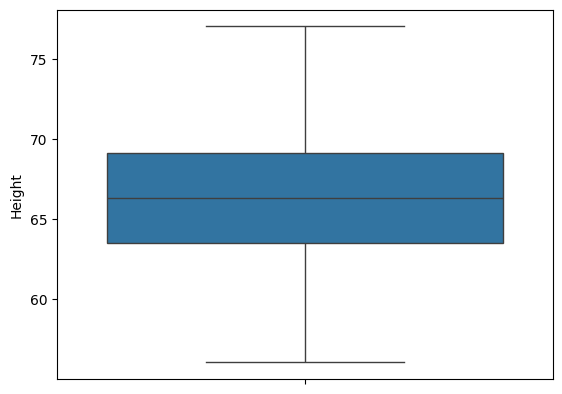

In [78]:
sns.boxplot(df_one.Height)


/var/folders/7d/nj3k6hhj3j1g_fkkwrvjhj880000gn/T/ipykernel_18885/3086520084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_one.Height)


<Axes: xlabel='Height', ylabel='Density'>

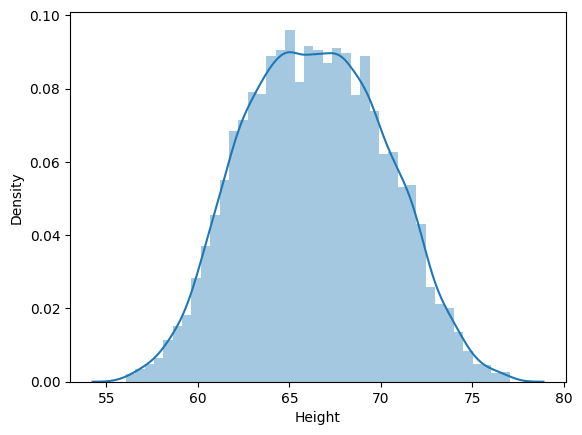

In [79]:
sns.distplot(df_one.Height)

We can try and test the min and max percentile values 

In [80]:
df_two = df.copy()

capping

In [81]:
df_two.Height = np.where(
    df_two.Height > max_per , max_per ,
    np.where(
        df_two.Height < min_per , min_per,
        df_two.Height
    )
)

In [82]:
df_two

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


/var/folders/7d/nj3k6hhj3j1g_fkkwrvjhj880000gn/T/ipykernel_18885/953805677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_two.Height)


<Axes: xlabel='Height', ylabel='Density'>

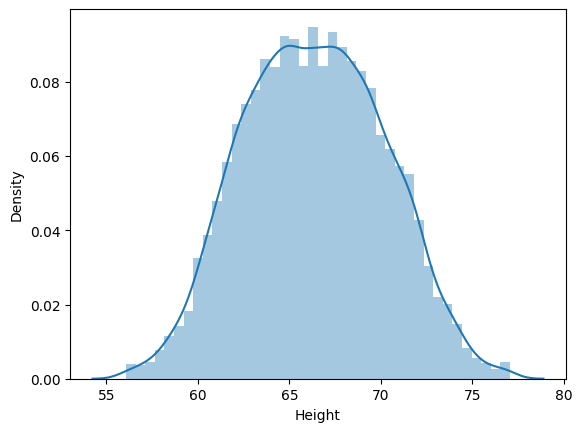

In [83]:
sns.distplot(df_two.Height)

<Axes: ylabel='Height'>

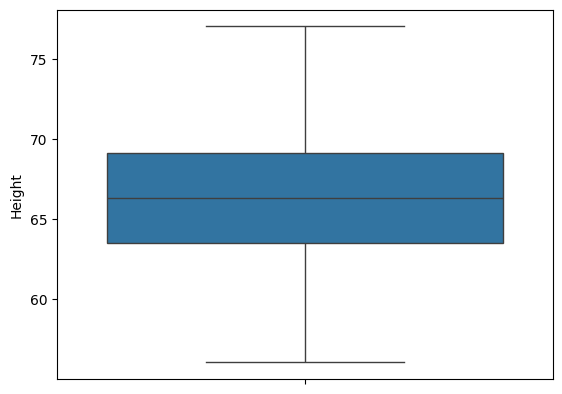

In [84]:
sns.boxplot(df_two.Height)

In [85]:
df.describe()


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [86]:
df_two.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367438,161.440357
std,3.842807,32.108439
min,56.066549,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,77.067389,269.989699
